# Predictive Model

In [2]:
'''
File Name: Term Records
Contents of Files:
- Study 36404 -
Data Files Description
The data file contains one record for each separate term in prison. An individual person may have more than one record, but all will be assigned the same Abt_Inmate_ID value.
File Dimensions:
• No. of Cases: 10,907,333 • No. of Variables: 18
• Record Length: 54
• Records per Case: 1
• Overall No. of Records: 10,907,333
'''

import pandas as pd

df = pd.read_stata('ICPSR_36404-V2/ICPSR_36404/DS0001/36404-0001-Data.dta')
print(df.head())


         ABT_INMATE_ID   SEX  \
0  A012015000000091071  Male   
1  A022015000000096906  Male   
2  A042015000000118649  Male   
3  A062015000000167469  Male   
4  A132015000000550479  Male   

                                             ADMTYPE OFFGENERAL EDUCATION  \
0                               New court commitment   Property         9   
1  Other admission (including unsentenced, transf...      Drugs         9   
2                               New court commitment    Violent         9   
3                           Parole return/revocation   Property         9   
4                               New court commitment    Violent         9   

  ADMITYR RELEASEYR  MAND_PRISREL_YEAR  PROJ_PRISREL_YEAR  PARELIG_YEAR  \
0    2006      2010                NaN                NaN           NaN   
1    2008      2008                NaN                NaN           NaN   
2    2013      2014             2014.0             2014.0           NaN   
3    1996      1996                NaN      

In [ ]:
#count by year total number of elderly prisoners in mass 

[2010, 2011, 2012, 2013, 2014]
[382, 396, 413, 423, 425]
y=11.300000x+(-22327.800000)
0.939726229026


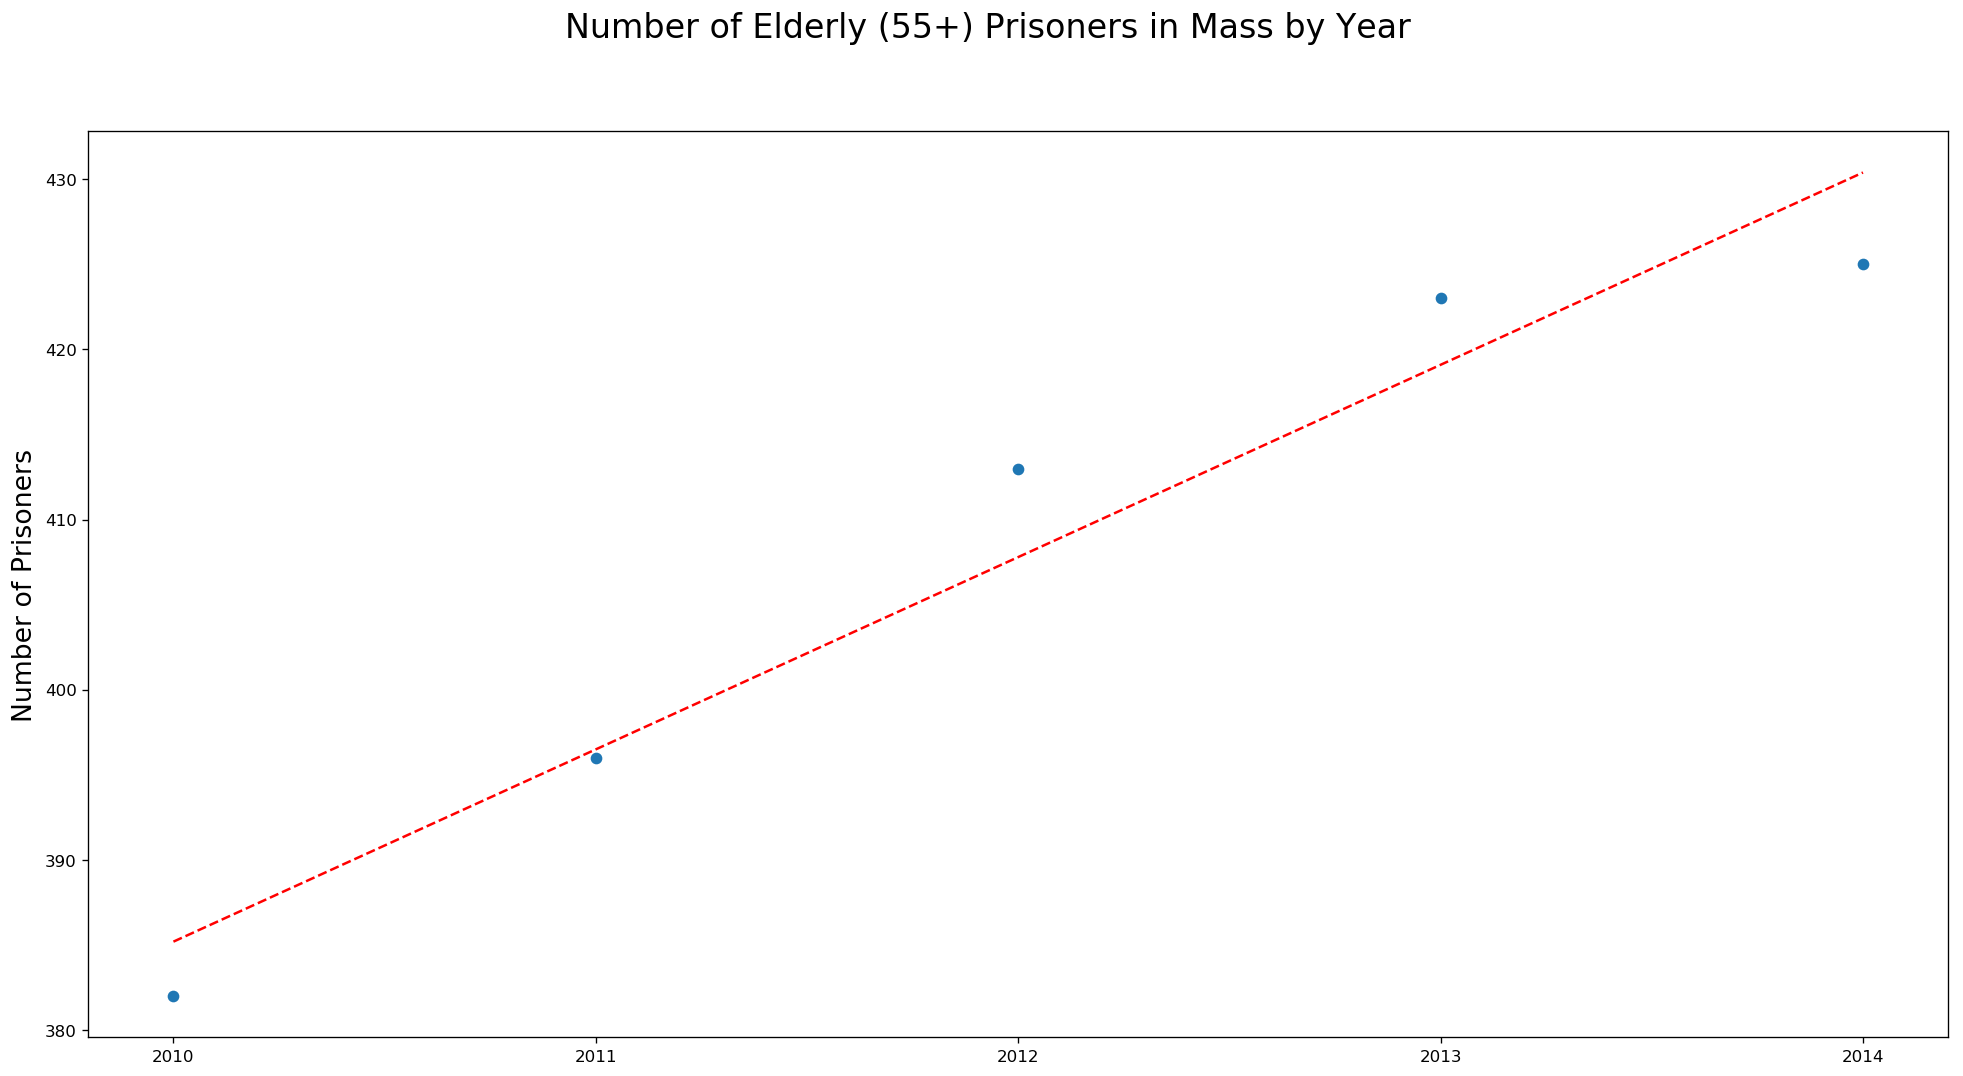

In [8]:
import matplotlib.pyplot as plt
import numpy
import pylab
import scipy
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import numpy as np
%matplotlib inline

df2copy = df4.copy()
df2copy = df2copy.query('STATE == "Massachusetts"')
df2copy.head()
df2copy = df2copy.query('AGEADMIT == "55+ years"')
grouped = df2copy.groupby(['RPTYEAR'])
nameList = []
groupList = []
for name, group in grouped:
    nameList.append(name)
    groupList.append(group["RPTYEAR"].count())

print(nameList)
print(groupList)

x = nameList
y = groupList


plt.figure(figsize=(20,10), dpi = 120)    
plt.suptitle("Number of Elderly (55+) Prisoners in Mass by Year", fontsize=20)
plt.ylabel('Number of Prisoners', fontsize=16)


# plot the data itself
plt.scatter(nameList, groupList)
plt.xticks(np.arange(min(nameList), max(nameList)+1, 1.0))

# calc the trendline
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)
pylab.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))


coefficient_of_dermination = r2_score(y, p(x))
print(coefficient_of_dermination)

[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[10755, 17497, 19332, 21687, 23027, 24646, 27209, 29682, 34319, 37738, 41389, 45022, 47340, 49809, 52376, 47151]
y=2704.992647x+(-5394506.558824)
0.96926298643


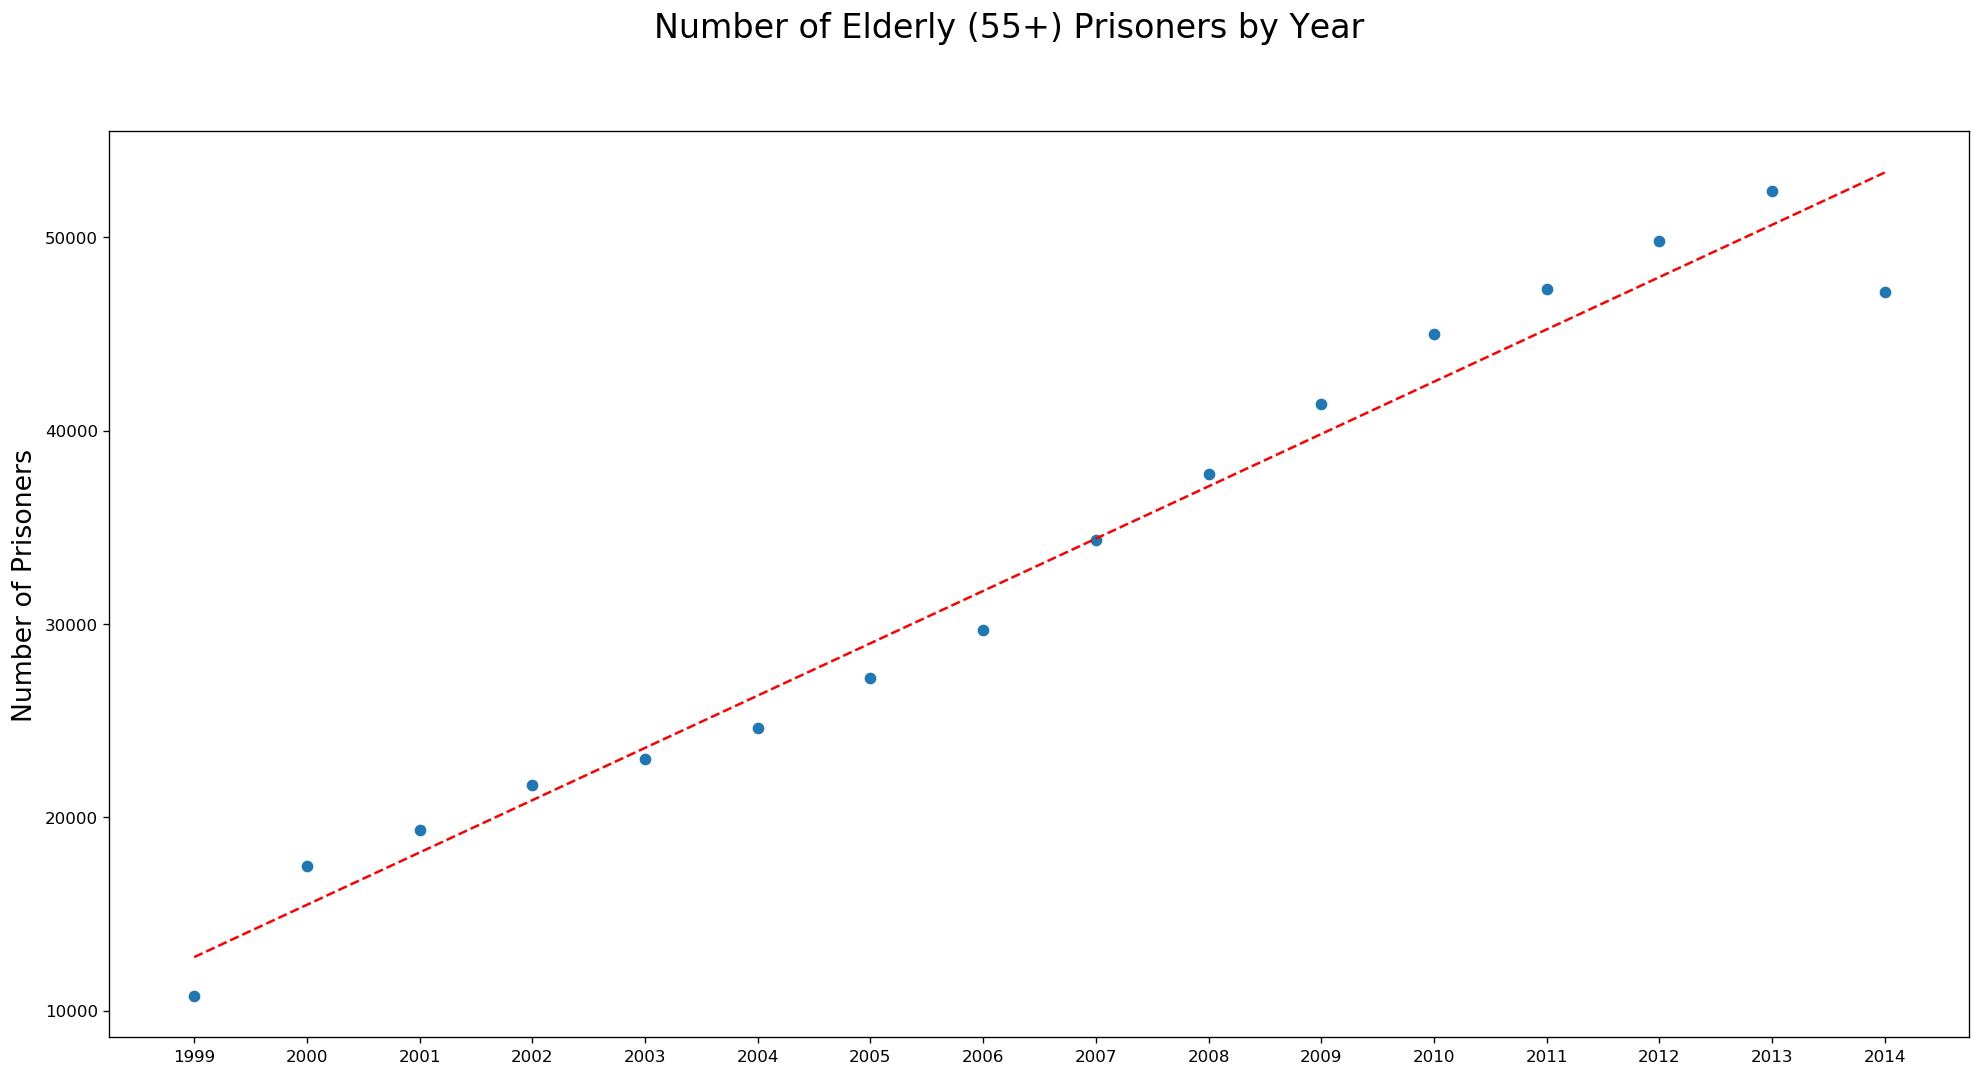

In [10]:
#count by year total number of elderly prisoners in country

df2copy = df4.copy()
df2copy.head()
df2copy = df2copy.query('AGEADMIT == "55+ years"')
grouped = df2copy.groupby(['RPTYEAR'])
nameList = []
groupList = []
for name, group in grouped:
    nameList.append(name)
    groupList.append(group["RPTYEAR"].count())

print(nameList)
print(groupList)

x = nameList
y = groupList

plt.figure(figsize=(20,10), dpi = 120)    
plt.suptitle("Number of Elderly (55+) Prisoners by Year", fontsize=20)
plt.ylabel('Number of Prisoners', fontsize=16)

# plot the data itself
plt.scatter(nameList, groupList)
plt.xticks(np.arange(min(nameList), max(nameList)+1, 1.0))

# calc the trendline
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)
pylab.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

coefficient_of_dermination = r2_score(y, p(x))
print(coefficient_of_dermination)

In [13]:
#Number of conditional releases per year for elderly in Mass

# Organize data so we have only what we want (55+, only mass etc)
dfcopy = df3.copy()
dfcopy = dfcopy.query('AGEADMIT == "55+ years"')
dfcopy = dfcopy.query('STATE == "Massachusetts"')


#dfcopy = dfcopy.loc[dfcopy['RELYR'] == 2014]
print("size of DF: ", len(dfcopy))


dfcopy.head()

size of DF:  879


,SEX,RPTYEAR,STATE,EDUCATION,ADMTYPE,OFFGENERAL,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,ADMITYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,RELYR,RELTYPE,AGERLSE,TIMESRVD_REL
529855,Male,1992,Massachusetts,Ungraded/unknown,New court commitment,Public order,NaN,NaN,NaN,1988,>=25 years,Public order,"Hispanic, any race",55+ years,1992,Unconditional release,55+ years,2-4.9 years
530047,Male,1992,Massachusetts,Ungraded/unknown,New court commitment,Drugs,NaN,NaN,NaN,1989,10-24.9 years,"Drugs (includes possession, distribution, traf...","White, non-Hispanic",55+ years,1992,Conditional release,55+ years,2-4.9 years
530250,Male,1992,Massachusetts,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1990,>=25 years,Robbery,"White, non-Hispanic",55+ years,1992,Conditional release,55+ years,1-1.9 years
530302,Male,1992,Massachusetts,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1991,10-24.9 years,Rape/sexual assault,"Black, non-Hispanic",55+ years,1992,"Other release (including death, transfer, AWOL...",55+ years,< 1 year
530359,Male,1992,Massachusetts,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1991,10-24.9 years,Rape/sexual assault,"Hispanic, any race",55+ years,1992,Conditional release,55+ years,1-1.9 years


In [18]:
conditionalReleaseList = []
indexToDrop = []
indexCount = -1
#Iterate through our DF and construct a list called "conditionalReleaseList", which is either 1 or 0
for index, row in dfcopy.iterrows():
    indexCount = indexCount + 1
    if row["RELTYPE"] == "Conditional release":
        conditionalReleaseList.append(1)
    elif row["RELTYPE"] == "Unconditional release":
        conditionalReleaseList.append(0)
    else:
        indexToDrop.append(indexCount)


#Drop the indices we don't want to consider
dfcopy = dfcopy.drop(dfcopy.index[indexToDrop])


print("Size Check")
print("Size of DF: ", len(dfcopy))
print("Size of conditionalReleaseList: ", len(conditionalReleaseList) )
dfcopy["CONDITIONAL_RELEASE"] = conditionalReleaseList

total = len(dfcopy)
dfcopy.head()

Size Check
Size of DF:  755
Size of conditionalReleaseList:  755


,SEX,RPTYEAR,STATE,EDUCATION,ADMTYPE,OFFGENERAL,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,ADMITYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,RELYR,RELTYPE,AGERLSE,TIMESRVD_REL,CONDITIONAL_RELEASE
529855,Male,1992,Massachusetts,Ungraded/unknown,New court commitment,Public order,NaN,NaN,NaN,1988,>=25 years,Public order,"Hispanic, any race",55+ years,1992,Unconditional release,55+ years,2-4.9 years,0
530047,Male,1992,Massachusetts,Ungraded/unknown,New court commitment,Drugs,NaN,NaN,NaN,1989,10-24.9 years,"Drugs (includes possession, distribution, traf...","White, non-Hispanic",55+ years,1992,Conditional release,55+ years,2-4.9 years,1
530250,Male,1992,Massachusetts,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1990,>=25 years,Robbery,"White, non-Hispanic",55+ years,1992,Conditional release,55+ years,1-1.9 years,1
530359,Male,1992,Massachusetts,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1991,10-24.9 years,Rape/sexual assault,"Hispanic, any race",55+ years,1992,Conditional release,55+ years,1-1.9 years,1
530444,Male,1992,Massachusetts,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1991,>=25 years,Rape/sexual assault,"White, non-Hispanic",55+ years,1992,Conditional release,55+ years,< 1 year,1


[2010, 2011, 2012, 2013, 2014]
[112, 113, 133, 135, 127]
[0.14834437086092717, 0.14966887417218544, 0.176158940397351, 0.17880794701986755, 0.16821192052980133]


Text(0,0.5,'Percentage of Conditional Releases')

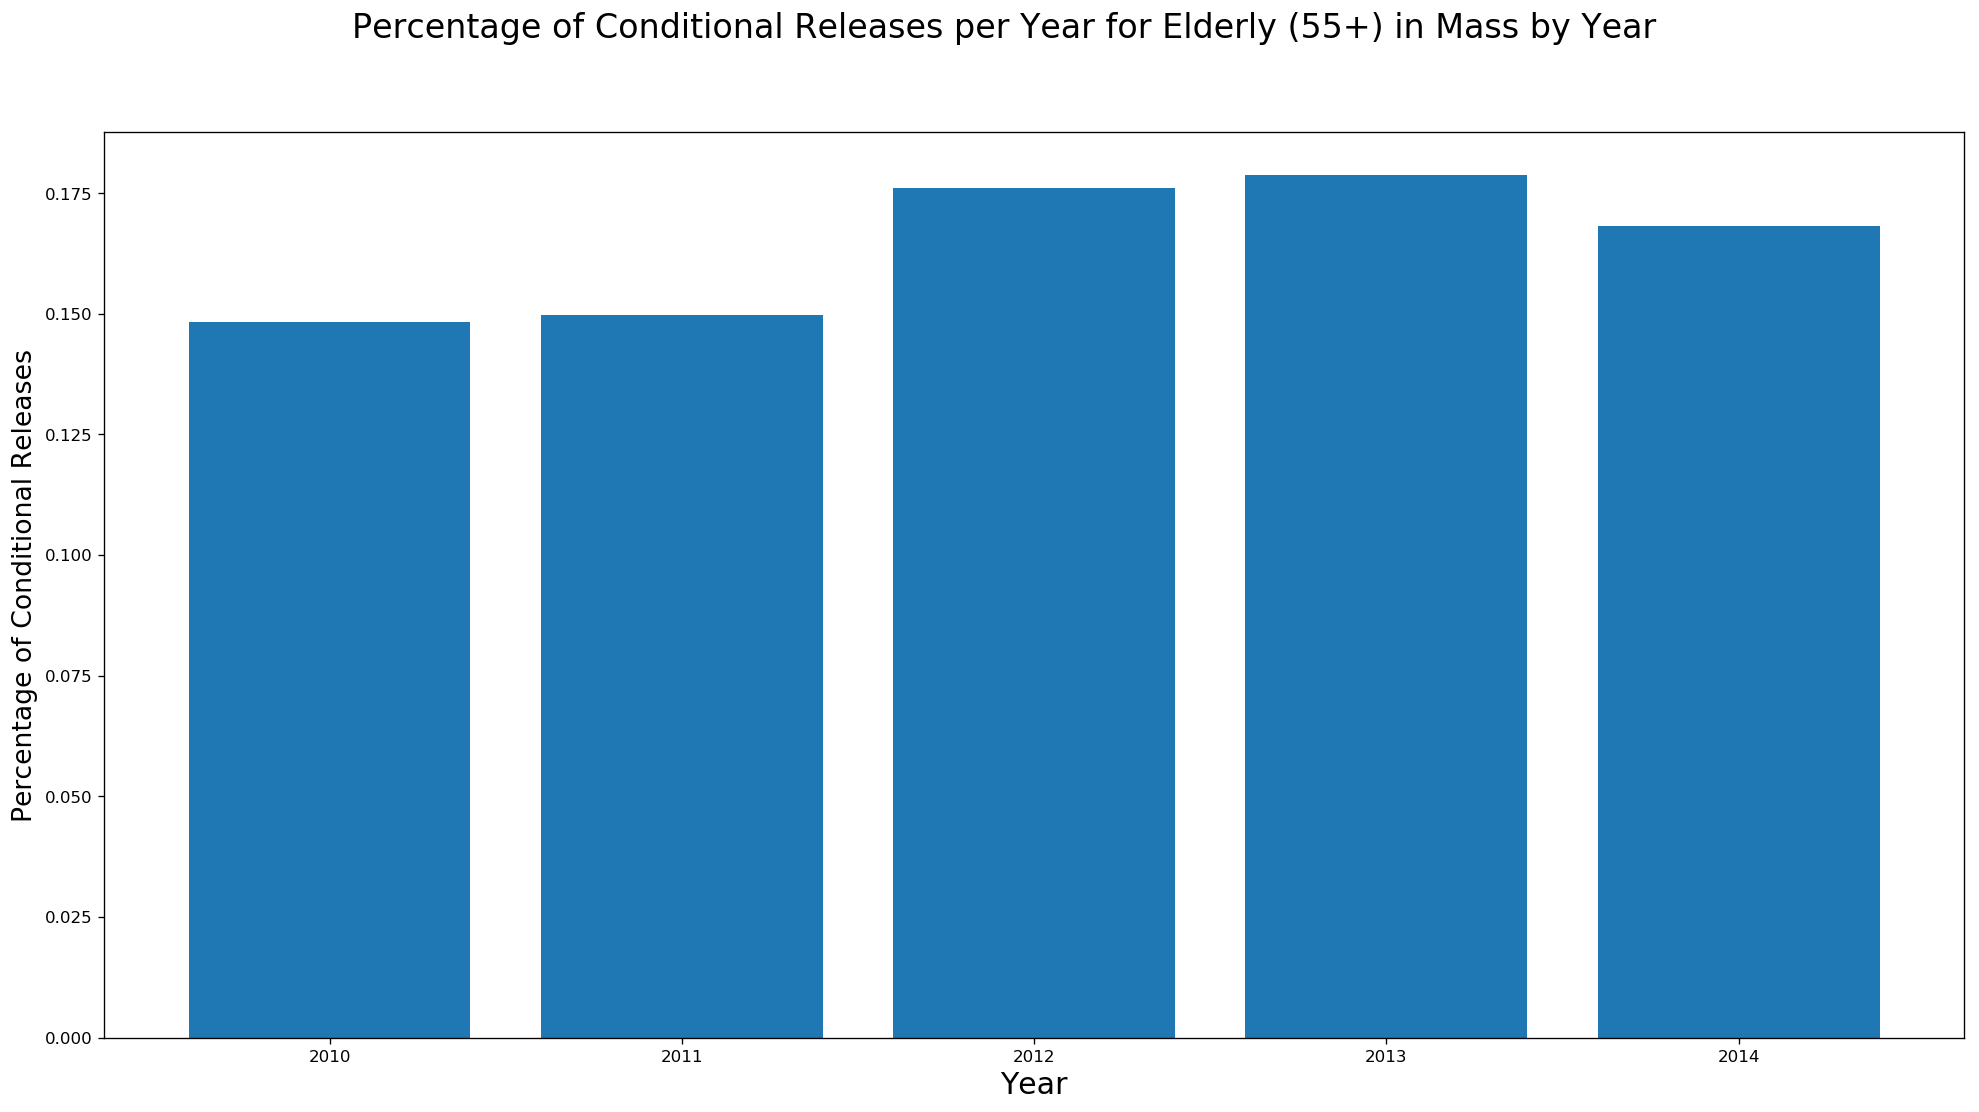

In [28]:
grouped = dfcopy.groupby(['RPTYEAR'])
nameList = []
groupList = []
for name, group in grouped:
    nameList.append(name)
    groupList.append(group["RPTYEAR"].count())

    
nameList = nameList[3:]
groupList = groupList[3:]

print(nameList)
print(groupList)

count = -1
for number in groupList:
    count = count + 1
    groupList[count] = number/total


print(groupList)

plt.figure(figsize=(20,10), dpi = 120)
plt.bar(np.arange(5), groupList)
plt.xticks(np.arange(5), nameList)


plt.suptitle("Percentage of Conditional Releases per Year for Elderly (55+) in Mass by Year", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Percentage of Conditional Releases', fontsize=16)





In [39]:
'''
File Name: Prison Admissions
Contents of Files:
The data file contains one record for each admission to prison. An individual person may have more than one record if s/he was admitted more than once.
File Dimensions:
• No. of Cases: 13,815,009 • No. of Variables: 14
• Record Length: 31
• Records per Case: 1
• Overall No. of Records: 13,815,009
'''
df2 = pd.read_stata('ICPSR_36404-V2/ICPSR_36404/DS0002/36404-0002-Data.dta')
df2.head()

,SEX,RPTYEAR,STATE,EDUCATION,ADMTYPE,OFFGENERAL,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,ADMITYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT
0,Male,1991,Alabama,HS diploma/GED,New court commitment,Property,NaN,NaN,NaN,1991.0,2-4.9 years,Burglary,"Black, non-Hispanic",18-24 years
1,Female,1991,Alabama,<HS diploma/GED,New court commitment,Property,NaN,NaN,NaN,1991.0,< 1 year,Larceny,"Black, non-Hispanic",18-24 years
2,Male,1991,Alabama,Ungraded/unknown,New court commitment,Drugs,NaN,NaN,NaN,1991.0,2-4.9 years,"Drugs (includes possession, distribution, traf...","Black, non-Hispanic",25-34 years
3,Male,1991,Alabama,HS diploma/GED,New court commitment,Public order,NaN,NaN,NaN,1991.0,5-9.9 years,Public order,"White, non-Hispanic",18-24 years
4,Male,1991,Alabama,<HS diploma/GED,New court commitment,Property,NaN,NaN,NaN,1991.0,5-9.9 years,Larceny,"Black, non-Hispanic",18-24 years


In [3]:
'''
File Name: Prison Releases
Contents of Files:
The data file contains one record for each release from prison. An individual person may have more than one record if s/he was released more than once.
File Dimensions:
• No. of Cases: 13,230,444 • No. of Variables: 18
• Record Length: 39
• Records per Case: 1
• Overall No. of Records: 13,230,444
'''

import pandas as pd

df3 = pd.read_stata('ICPSR_36404-V2/ICPSR_36404/DS0003/36404-0003-Data.dta')
df3.head()

,SEX,RPTYEAR,STATE,EDUCATION,ADMTYPE,OFFGENERAL,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,ADMITYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,RELYR,RELTYPE,AGERLSE,TIMESRVD_REL
0,Male,1991,Alabama,Any college,New court commitment,Violent,NaN,NaN,NaN,1983,>=25 years,Murder (including non-negligent manslaughter),"White, non-Hispanic",25-34 years,1991,Conditional release,35-44 years,5-9.9 years
1,Male,1991,Alabama,HS diploma/GED,New court commitment,Violent,NaN,NaN,NaN,1987,10-24.9 years,Robbery,"White, non-Hispanic",25-34 years,1991,Unconditional release,25-34 years,2-4.9 years
2,Male,1991,Alabama,HS diploma/GED,New court commitment,Drugs,NaN,NaN,NaN,1987,10-24.9 years,"Drugs (includes possession, distribution, traf...","White, non-Hispanic",45-54 years,1991,"Other release (including death, transfer, AWOL...",45-54 years,2-4.9 years
3,Male,1991,Alabama,HS diploma/GED,New court commitment,Property,NaN,NaN,NaN,1989,10-24.9 years,Burglary,"Black, non-Hispanic",35-44 years,1991,Unconditional release,35-44 years,2-4.9 years
4,Male,1991,Alabama,Any college,New court commitment,Public order,NaN,NaN,NaN,1989,5-9.9 years,Public order,Missing,25-34 years,1991,Unconditional release,25-34 years,2-4.9 years


In [2]:
'''
File Name: Year-End Population
Contents of Files:
The data file contains one record for each prisoner in custody on December 31 of each year. An individual person may have more than one record if s/he stayed in prison longer than one year, or if the individual had one or more returns to prison for which s/he was in custody on December 31 in multiple years.
File Dimensions:
• No. of Cases: 18,561,093 • No. of Variables: 16
• Record Length: 33
• Records per Case: 1
• Overall No. of Records: 18,561,093
'''

import pandas as pd

df4 = pd.read_stata('ICPSR_36404-V2/ICPSR_36404/DS0004/36404-0004-Data.dta')
df4.head()

,SEX,RPTYEAR,STATE,EDUCATION,ADMTYPE,OFFGENERAL,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,ADMITYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGEYREND,TIMESRVD_YREND
0,Male,1999,California,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1955,"Life, LWOP, Life plus additional years, Death",Murder (including non-negligent manslaughter),"Black, non-Hispanic",18-24 years,55+ years,>=10 years
1,Male,1999,California,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1955,"Life, LWOP, Life plus additional years, Death",Murder (including non-negligent manslaughter),"Other race(s), non-Hispanic",25-34 years,55+ years,>=10 years
2,Male,1999,California,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1957,"Life, LWOP, Life plus additional years, Death",Aggravated or simple assault,"Black, non-Hispanic",18-24 years,55+ years,>=10 years
3,Male,1999,California,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1957,"Life, LWOP, Life plus additional years, Death",Murder (including non-negligent manslaughter),"White, non-Hispanic",18-24 years,55+ years,>=10 years
4,Male,1999,California,Ungraded/unknown,New court commitment,Violent,NaN,NaN,NaN,1957,"Life, LWOP, Life plus additional years, Death",Murder (including non-negligent manslaughter),"White, non-Hispanic",25-34 years,55+ years,>=10 years


2010
% of inmates with race White, non-Hispanic = 0.62
% of inmates with race Black, non-Hispanic = 0.12
% of inmates with race Hispanic, any race = 0.15
% of inmates with race Other race(s), non-Hispanic = 0.02
% of inmates with race Missing = 0.09
2011
% of inmates with race White, non-Hispanic = 0.57
% of inmates with race Black, non-Hispanic = 0.15
% of inmates with race Hispanic, any race = 0.15
% of inmates with race Other race(s), non-Hispanic = 0.02
% of inmates with race Missing = 0.10
2012
% of inmates with race White, non-Hispanic = 0.58
% of inmates with race Black, non-Hispanic = 0.15
% of inmates with race Hispanic, any race = 0.14
% of inmates with race Other race(s), non-Hispanic = 0.02
% of inmates with race Missing = 0.11
2013
% of inmates with race White, non-Hispanic = 0.58
% of inmates with race Black, non-Hispanic = 0.16
% of inmates with race Hispanic, any race = 0.14
% of inmates with race Other race(s), non-Hispanic = 0.02
% of inmates with race Missing = 0.10


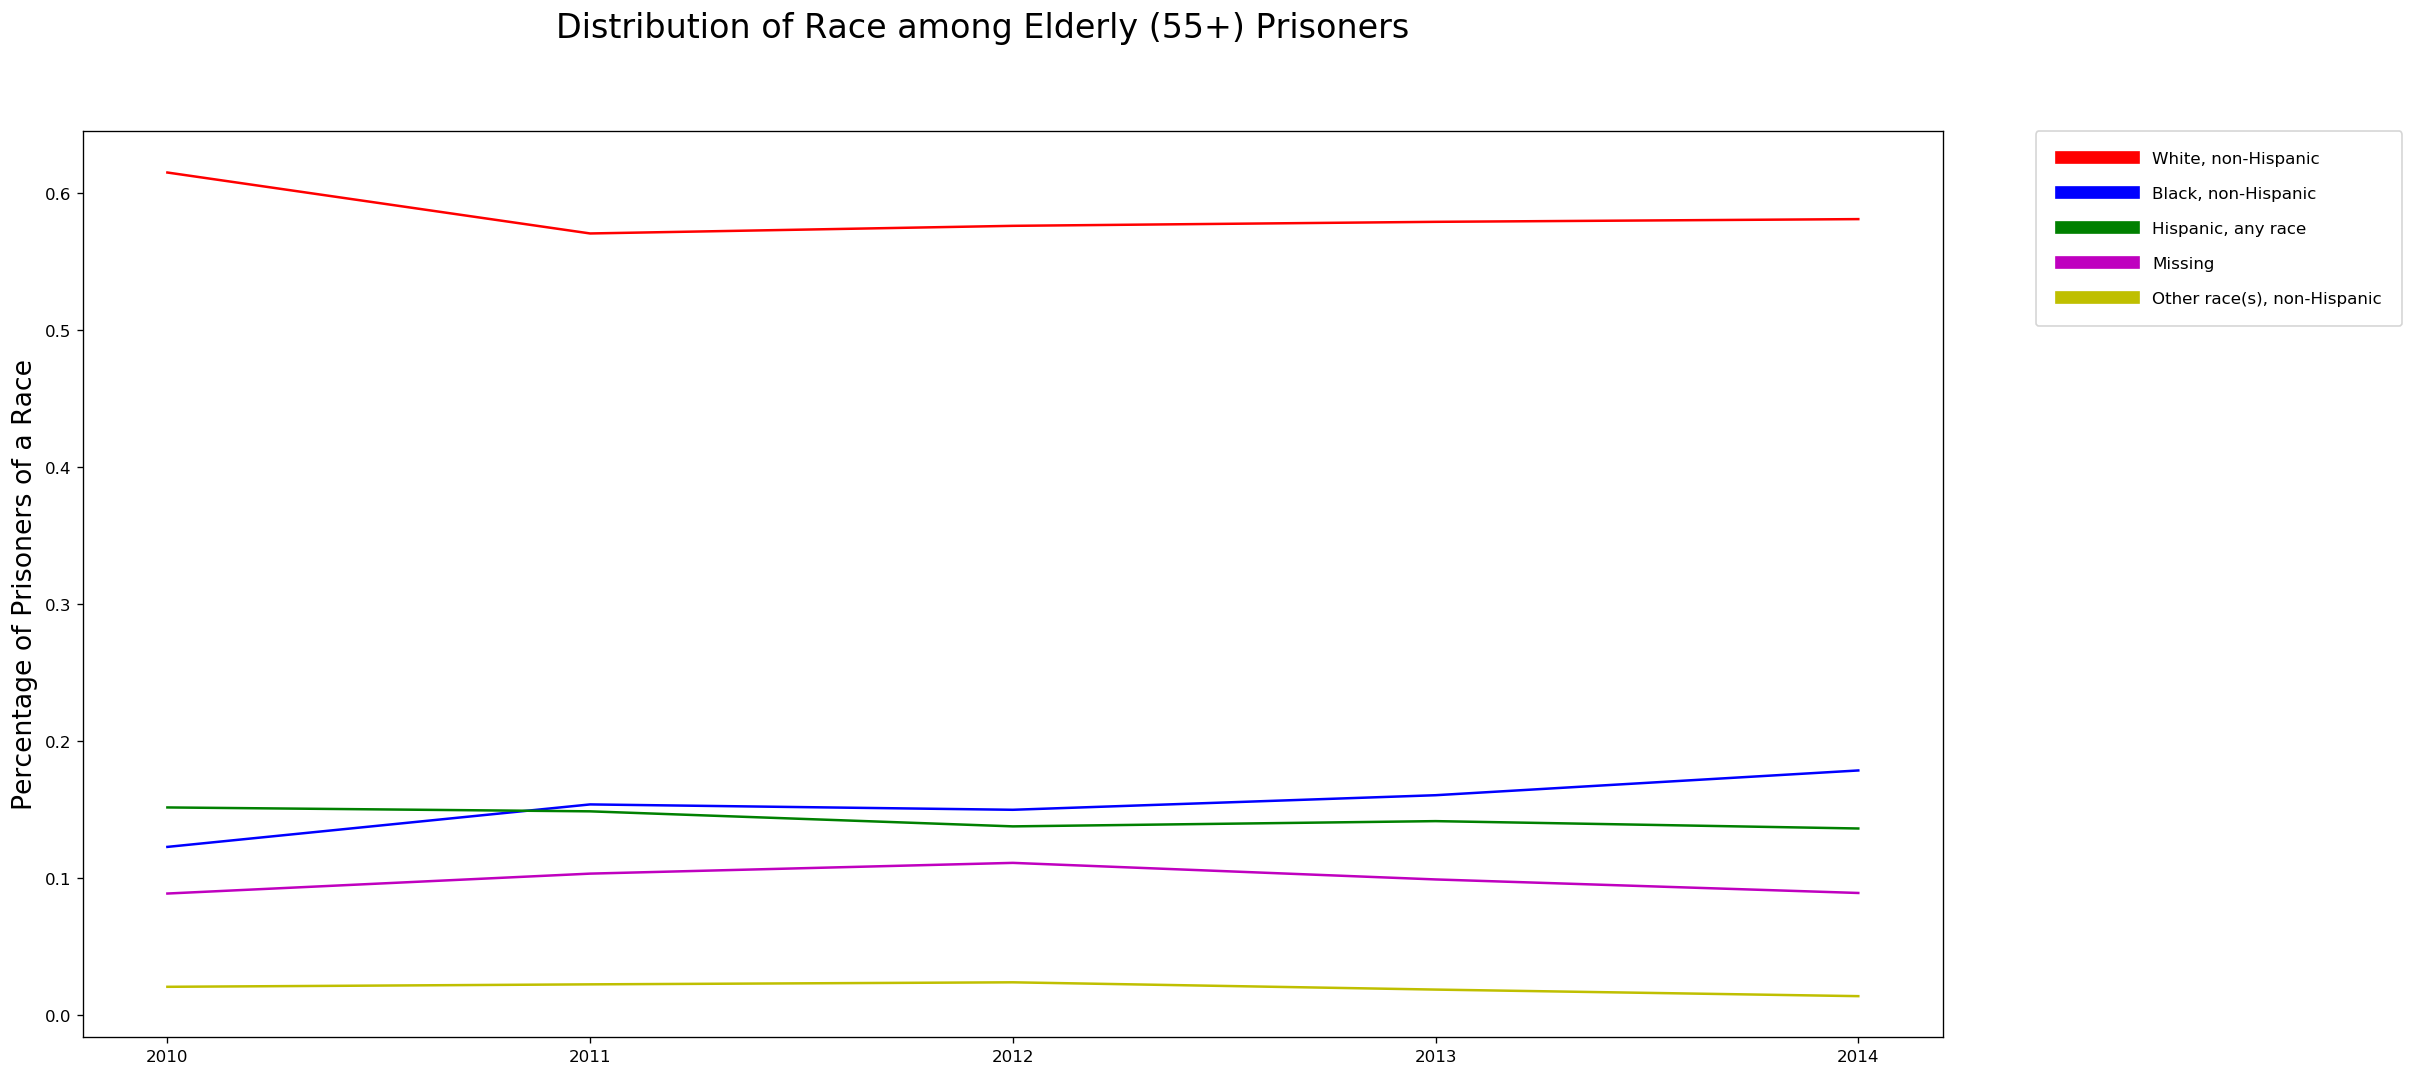

In [41]:
import matplotlib.patches as mpatches
#gets percentage by race by year
yearlist = []

counter = 0
whitelist = []
blacklist = []
hislist = []
mislist = []
otherlist = []
for key, value in yeardict.items():
    print (key)
    sum1 = 0
    otherbool = False
    misbool = False
    for item in value:
        sum1 += (item[1])
    #print(sum1)
    yearlist.append(key)
    for item in value:
        if item[0] == 'White, non-Hispanic':
            whitelist.append(item[1]/sum1)
        elif item[0] == 'Black, non-Hispanic':
            blacklist.append(item[1]/sum1)
        elif item[0] == 'Hispanic, any race':
            hislist.append(item[1]/sum1)
        elif item[0] == 'Missing':
            mislist.append(item[1]/sum1)
            misbool = True
        elif item[0] == 'Other race(s), non-Hispanic':
            otherlist.append(item[1]/sum1)
            otherbool = True
        
        print("% of inmates with race " + item[0] + " = %.2f" % (item[1]/sum1))
    counter+=1
    if otherbool == False:
        otherlist.append(0)
    if misbool == False:
        mislist.append(0)
print(yearlist)

print(whitelist)
print(blacklist)
print(hislist)
print(mislist)
print(otherlist)


plt.figure(figsize=(20,10), dpi = 120)    
plt.suptitle("Distribution of Race among Elderly (55+) Prisoners", fontsize=20)
plt.ylabel('Percentage of Prisoners of a Race', fontsize=16)
plt.xticks(np.arange(min(yearlist), max(yearlist)+1, 1.0))

r_patch = mpatches.Patch(color='r', label='White, non-Hispanic')
b_patch = mpatches.Patch(color='b', label='Black, non-Hispanic')
g_patch = mpatches.Patch(color='g', label='Hispanic, any race')
m_patch = mpatches.Patch(color='m', label='Missing')
y_patch = mpatches.Patch(color='y', label='Other race(s), non-Hispanic')
plt.legend(handles=[r_patch,b_patch,g_patch,m_patch,y_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handlelength=5, borderpad=1.2, labelspacing=1.2)

plt.plot(yearlist, whitelist, c='r')
plt.plot(yearlist, blacklist, c='b')
plt.plot(yearlist, hislist, c='g')
plt.plot(yearlist, mislist, c='m')
plt.plot(yearlist, otherlist, c='y')


plt.show()


compare the percentage of people of race/minorites that get admitted and compare to overall minority population of the
state we can find out if certain races are more likely to be admitted in prison while they are older.

find census data. 1% will go to jail. of the percentage that go to jail, we can find which race of people get re-admitted
to jail and thus 

percentage of people getting re-admitted to prision will be overrepresented compared to state census.


In [33]:
'''
Graph of how many inmates increase being 55+ compared to the nation over 16 years
'''

dfyears = df4.copy()
#query for only those who are 55+ in a given year in prison
dfyears = dfyears.query('AGEYREND == "55+ years"')
#The year the data was taken
grouped = dfyears.groupby(['RPTYEAR'])
countdf = grouped.count()
countdf

,SEX,STATE,EDUCATION,ADMTYPE,OFFGENERAL,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,ADMITYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGEYREND,TIMESRVD_YREND
RPTYEAR,,,,,,,,,,,,,,,
1999,23373,23373,23373,23373,23373,0,0,0,23373,23373,23373,23373,23373,23373,23373
2000,36826,36826,36826,36826,36826,15770,17177,11254,36826,36826,36826,36826,36826,36826,36826
2001,41741,41741,41741,41741,41741,14556,16474,13271,41741,41741,41741,41741,41741,41741,41741
2002,48362,48362,48362,48362,48362,18226,20220,15980,48362,48362,48362,48362,48362,48362,48362
2003,50047,50047,50047,50047,50047,27118,22470,23274,50047,50047,50047,50047,50047,50047,50047
2004,54430,54430,54430,54430,54430,29187,24775,25181,54430,54430,54430,54430,54430,54430,54430
2005,60236,60236,60236,60236,60236,28822,35082,27683,60236,60236,60236,60236,60236,60236,60236
2006,66260,66260,66260,66260,66260,32261,39524,31015,66260,66260,66260,66260,66260,66260,66260
2007,77450,77450,77450,77450,77450,36091,47236,33640,77450,77450,77450,77450,77450,77450,77450


In [35]:
#To graph this, just use sex as number of inmates; every inmate has a sex value.
vector = []
for index, row in countdf.iterrows():
    vector.append(row["SEX"])
    
print(vector)

[23373, 36826, 41741, 48362, 50047, 54430, 60236, 66260, 77450, 85320, 94748, 104854, 112532, 120368, 126709, 113777]


Text(0,0.5,'Number of Prisoners')

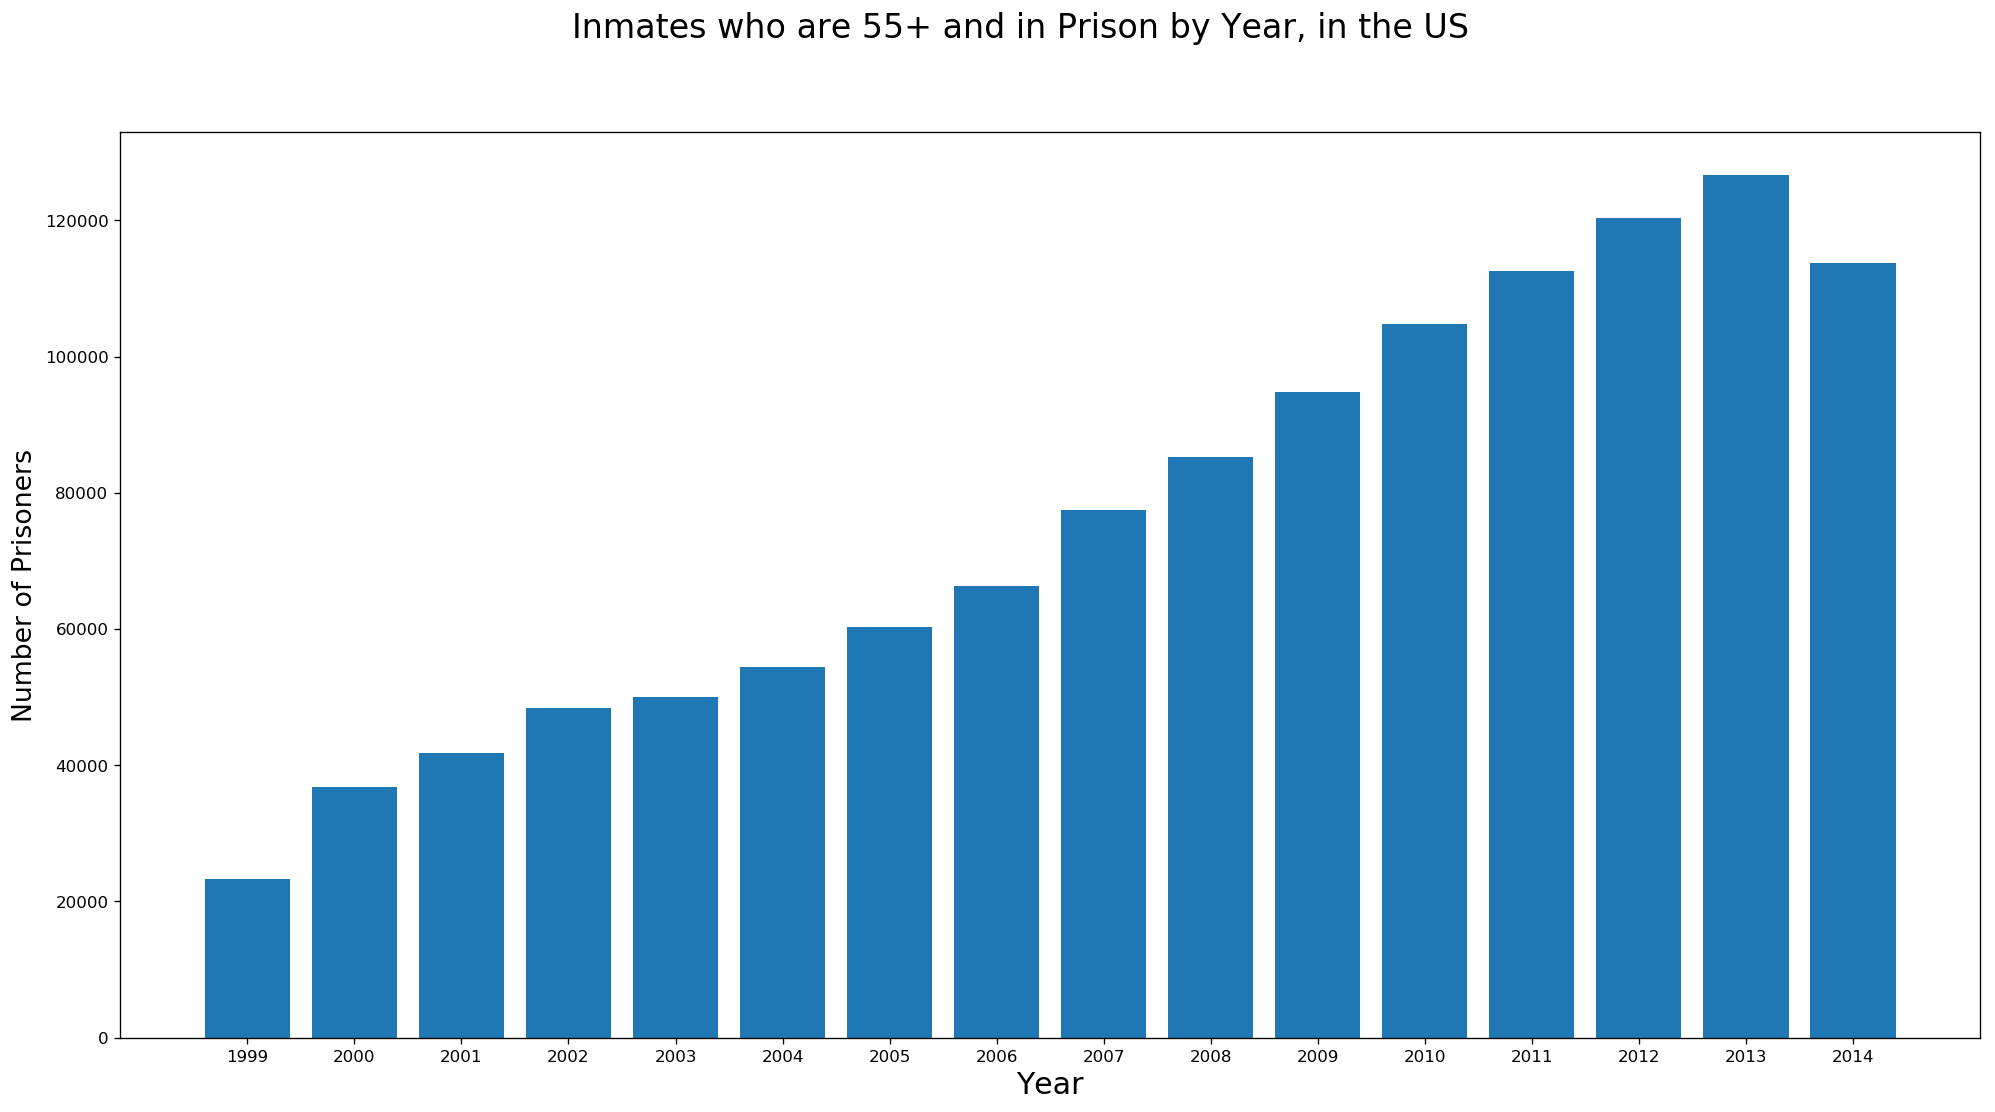

In [49]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

years = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

plt.figure(figsize=(20,10), dpi = 120)
plt.bar(years, vector)
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.suptitle("Inmates who are 55+ and in Prison by Year, in the US", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Prisoners', fontsize=16)